In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vid_games=pd.read_csv('vgsales.csv')#import videogame sales files
vid_games.head()#view first 5 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vid_games.tail()  #view last 5 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
vid_games.info()#view info about videogames sales dataframe. Year and Publisher columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vid_games.isnull().sum() #find total number of null fields in each column

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
vid_games.shape #show the shape of the dataframe

(16598, 11)

**The dataset imported for analysis contains two columns, 'Publisher' and 'Year', with missing values. This presents us with two options to choose from. Either drop rows with missing values or fill them with arbitrary values. Dropping rows will affect analysis which do not depend on Year and Publisher columns. 
Decision made here is to fill empty 'Year' cells with '0' and 'Publisher' cells with 'Unknown'. When Publisher and Year columns are required in analysis, rows with values originally missing are excluded from analysis.**

In [7]:
vid_games['Year']=vid_games['Year'].fillna(0)   #fill empty year cells with 0

In [8]:
vid_games.astype({'Year':'int16'}).dtypes     #convert year column datatype to int16 (int16 to save memory because of year range)

Rank              int64
Name             object
Platform         object
Year              int16
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# All sales values are x10^6 (multiplied by 1,000,000)

In [9]:
vid_games.describe()   #shows some stats on each column

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
vid_games['Publisher']=vid_games['Publisher'].fillna('Unknown')  #Fill missing Publisher cells with value 'Unknown'

In [11]:
vid_games[vid_games.Publisher=='Unknown']   #show rows with missing Publisher fields replaced with 'Unknown'

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1303,1305,Triple Play 99,PS,0.0,Sports,Unknown,0.81,0.55,0.00,0.10,1.46
1649,1651,NASCAR Thunder 2003,PS2,0.0,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,Unknown,0.87,0.32,0.00,0.02,1.21
2114,2116,Suikoden III,PS2,0.0,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,0.0,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,Unknown,0.67,0.25,0.00,0.02,0.93
2236,2238,Teenage Mutant Ninja Turtles,GBA,2003.0,Action,Unknown,0.67,0.25,0.00,0.02,0.93
2286,2288,Namco Museum,XB,0.0,Misc,Unknown,0.77,0.11,0.00,0.04,0.91


In [12]:
vid_games[vid_games.Year==0]   #Display rows with missing Year field replaced with '0'

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,0.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,0.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,0.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,0.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,0.0,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,0.0,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,0.0,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,0.0,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [13]:
vid_games.Name.value_counts()   #Show appearance of each game and number of times it appears in dataset, an indication of the number of platforms it is available on

Need for Speed: Most Wanted                                  12
Ratatouille                                                   9
Madden NFL 07                                                 9
LEGO Marvel Super Heroes                                      9
FIFA 14                                                       9
LEGO The Hobbit                                               8
LEGO Star Wars II: The Original Trilogy                       8
Monopoly                                                      8
Cars                                                          8
Angry Birds Star Wars                                         8
LEGO Harry Potter: Years 5-7                                  8
LEGO Jurassic World                                           8
FIFA 15                                                       8
Lego Batman 3: Beyond Gotham                                  8
FIFA Soccer 13                                                8
The LEGO Movie Videogame                

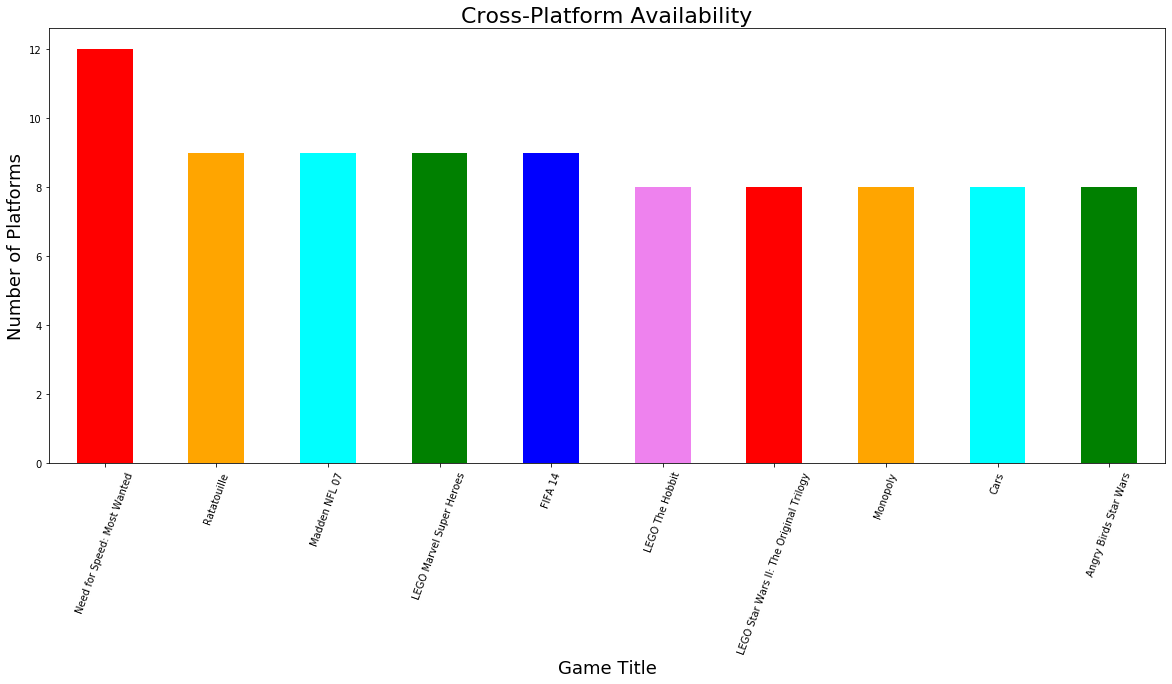

In [14]:
vid_games.Name.value_counts().head(10).plot(kind='bar', figsize=(20,8),color=['red', 'orange', 'cyan', 'green','blue', 'violet',])  #plots a graph of the first 10 games with availability on most platforms
plt.title('Cross-Platform Availability', fontsize=22)
plt.xticks(rotation=70)
plt.xlabel('Game Title',fontsize=18)
plt.ylabel('Number of Platforms', fontsize=18);

**Need for Speed Most Wanted is the game with the most availability across platforms, being available on 12 platforms, every other game is available on less than 10 platforms.**

In [15]:
vid_games.Platform.value_counts()   #Shows the number of game Platforms and the number of games available on each

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

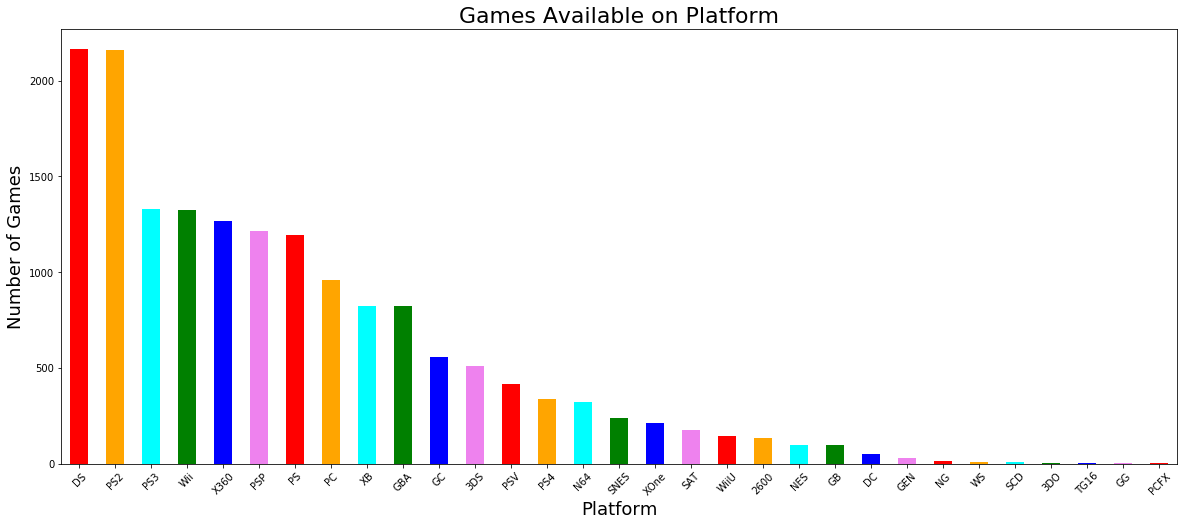

In [16]:
vid_games.Platform.value_counts().plot(kind='bar', figsize=(20,8),color=['red', 'orange', 'cyan', 'green','blue', 'violet',]) #Plots the distribution of games per platform 
plt.title('Games Available on Platform', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Platform',fontsize=18)
plt.ylabel('Number of Games', fontsize=18);

**DS and PS2 have the most number of game titles at over 2100 Games each. In third place is the PS3 Platform, with less than 1400 Games, a difference of over 700 Games.**

In [17]:
vid_games[vid_games.Publisher!='Unknown'].Publisher.value_counts()   #Shows the number of games published by each Publisher (This excludes the rows with missing publishers)

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher                                184
Acclaim Enter

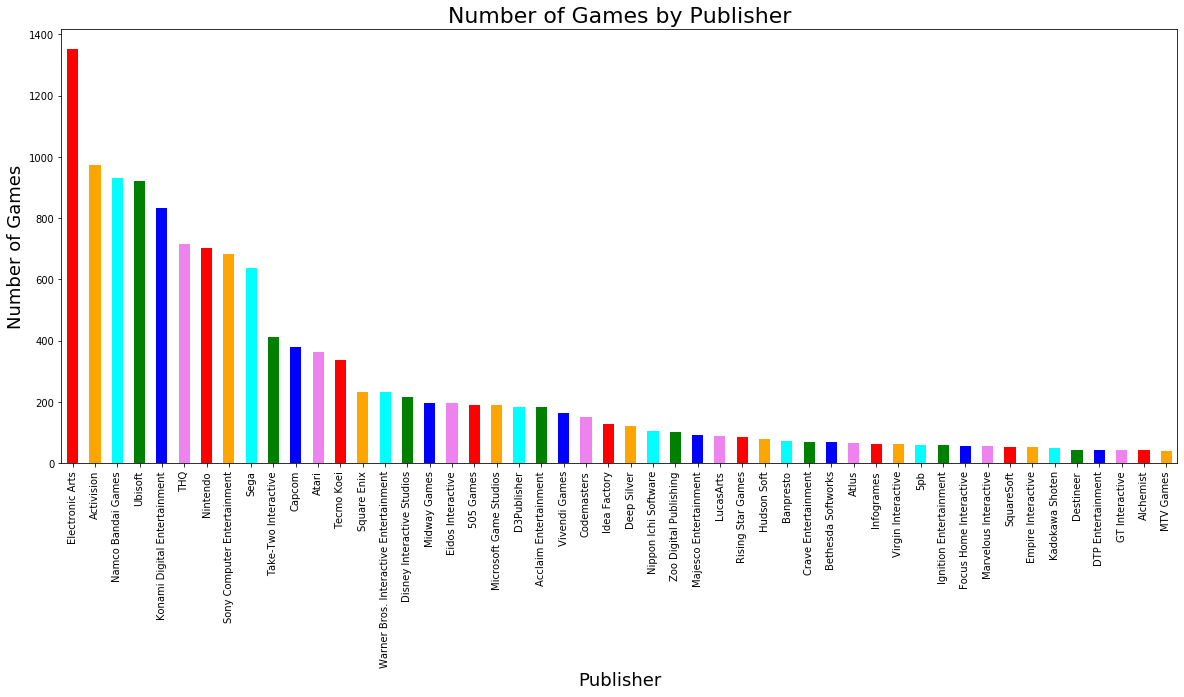

In [18]:
vid_games[vid_games.Publisher!='Unknown'].Publisher.value_counts().head(50).plot(kind='bar',figsize=(20,8),color=['red', 'orange', 'cyan', 'green','blue', 'violet',]) #Plot the number of games per Publisher (This excludes the rows with missing publishers) 
plt.title('Number of Games by Publisher', fontsize=22)
plt.xlabel('Publisher',fontsize=18)
plt.ylabel('Number of Games', fontsize=18);

**Electronic Arts leads the way in games published by close to 400 Games with majority of publishers publishing less than 100 Games**

In [19]:
vid_games[vid_games.Year!=0].Year.value_counts()  #Shows the number of games published each Year (This excludes the rows with missing years)

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [20]:
vid_games.Genre.value_counts()   #Shows the total number of games available for each Genre

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

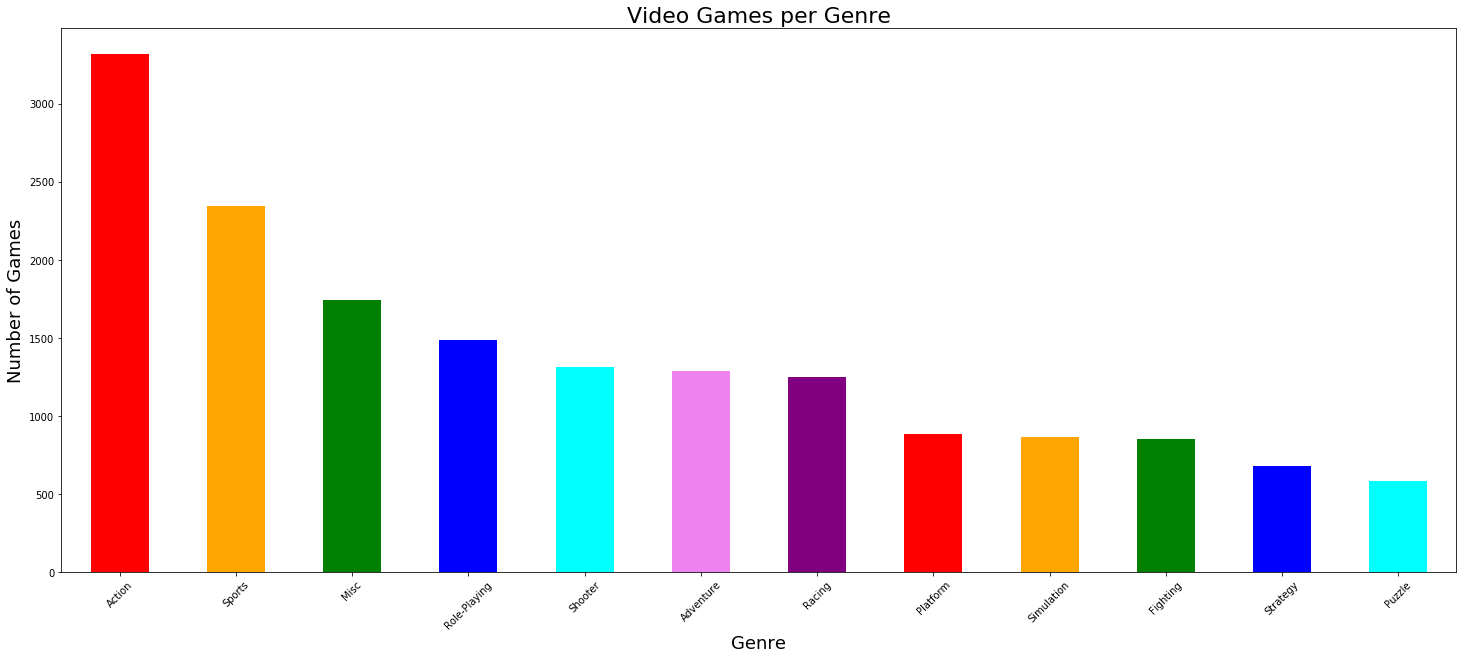

In [21]:
#Plots the number of games available in each Genre
vid_games.Genre.value_counts().plot(kind='bar', color=['red', 'orange', 'green', 'blue', 'cyan', 'violet', 'purple'], figsize=(25,10))
plt.title('Video Games per Genre', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Number of Games', fontsize=18);

# Breakdown of Games sold Globally from 1980 to 2020

In [22]:
vid_games.Global_Sales.sum() #Shows the total sales of games from 1980 to 2020. Value is x10^6, approximately 8.9billion games sold

8920.44

**We have here the total game sales for each region. North America leads the way in total games sold with almost 50%, followed by Europe**

In [23]:
vid_games[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()  #Shows the breakdown of games sales per region

NA_Sales       4392.95
JP_Sales       1291.02
EU_Sales       2434.13
Other_Sales     797.75
dtype: float64

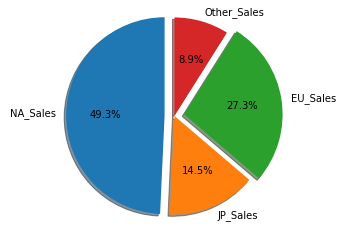

In [24]:
#Plots a pie chart of the total sales per region
fig1, ax1 = plt.subplots()
ax1.pie(vid_games[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum(), explode=(0.1,0,0.1,0),shadow=True,labels=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'],startangle=90,autopct='%1.1f%%')
ax1.axis('equal');

**Close to 50% of games (43 Billion) have been sold in North America alone, establishing North America as an ideal market for selling video games** 

In [25]:
#Gives a breakdown of the the number of games published in each Genre for each year from 1980 to 2020
vid_games.groupby([vid_games[vid_games.Year!=0].Year,vid_games[vid_games.Year!=0].Genre]).agg({'Global_Sales':'count'})

Global_Sales
Year   Genre                     
1980.0 Action                   1
       Fighting                 1
       Misc                     4
       Shooter                  2
       Sports                   1
1981.0 Action                  25
       Platform                 3
       Puzzle                   2
       Racing                   1
       Shooter                 10
       Simulation               1
       Sports                   4
1982.0 Action                  18
       Misc                     1
       Platform                 5
       Puzzle                   3
       Racing                   2
       Shooter                  5
       Sports                   2
1983.0 Action                   7
       Adventure                1
       Misc                     1
       Platform                 5
       Puzzle                   1
       Shooter                  1
       Sports                   1
1984.0 Action                   1
       Misc                     1
       Platform                 1
       Puzzle                   3
...                           ...
2014.0 Shooter                 47
       Simulation              11
       Sports                  55
       Strategy                 8
2015.0 Action                 255
       Adventure               54
       Fighting                21
       Misc                    39
       Platform                14
       Puzzle                   6
       Racing                  19
       Role-Playing            78
       Shooter                 34
       Simulation              15
       Sports                  62
       Strategy                17
2016.0 Action                 119
       Adventure               34
       Fighting                14
       Misc                    18
       Platform                10
       Racing                  20
       Role-Playing            40
       Shooter                 32
       Simulation               9
       Sports                  38
       Strategy                10
2017.0 Action                   1
       Role-Playing             2
2020.0 Simulation               1

[389 rows x 1 columns]

In [26]:
#Gives a breakdown of the the number of games sold in each Genre for each year from 1980 to 2020. 
vid_games.groupby([vid_games[vid_games.Year!=0].Year,vid_games[vid_games.Year!=0].Genre]).agg({'Global_Sales':'sum'})

Global_Sales
Year   Genre                     
1980.0 Action                0.34
       Fighting              0.77
       Misc                  2.71
       Shooter               7.07
       Sports                0.49
1981.0 Action               14.84
       Platform              6.93
       Puzzle                2.24
       Racing                0.48
       Shooter              10.04
       Simulation            0.45
       Sports                0.79
1982.0 Action                6.52
       Misc                  0.87
       Platform              5.03
       Puzzle               10.03
       Racing                1.57
       Shooter               3.79
       Sports                1.05
1983.0 Action                2.86
       Adventure             0.40
       Misc                  2.14
       Platform              6.93
       Puzzle                0.78
       Shooter               0.48
       Sports                3.20
1984.0 Action                1.85
       Misc                  1.45
       Platform              0.69
       Puzzle                3.14
...                           ...
2014.0 Shooter              66.00
       Simulation            5.55
       Sports               46.66
       Strategy              0.99
2015.0 Action               70.70
       Adventure             8.03
       Fighting              7.78
       Misc                 11.69
       Platform              6.05
       Puzzle                0.70
       Racing                7.92
       Role-Playing         36.44
       Shooter              66.15
       Simulation            5.62
       Sports               41.54
       Strategy              1.82
2016.0 Action               19.91
       Adventure             1.81
       Fighting              3.86
       Misc                  1.17
       Platform              2.07
       Racing                1.64
       Role-Playing          6.76
       Shooter              18.22
       Simulation            0.39
       Sports               14.60
       Strategy              0.50
2017.0 Action                0.01
       Role-Playing          0.04
2020.0 Simulation            0.29

[389 rows x 1 columns]

In [27]:
#Shows a breakdown of games sold globally according to Genre 
vid_games.groupby(vid_games.Genre).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False)

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


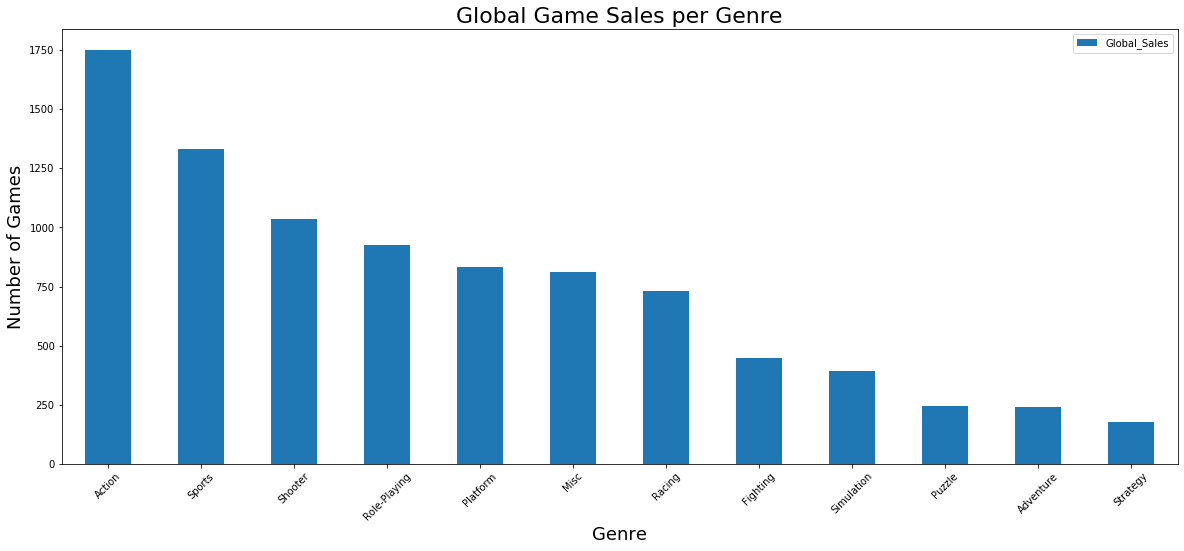

In [28]:
#Plots the breakdown of games sold globally according to Genre from 1980 to 2020
vid_games.groupby(vid_games.Genre).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Global Game Sales per Genre', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Number of Games', fontsize=18);

In [29]:
#Shows the breakdown of games sold globally according to Platform from 1980 to 2020
vid_games.groupby(vid_games.Platform).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


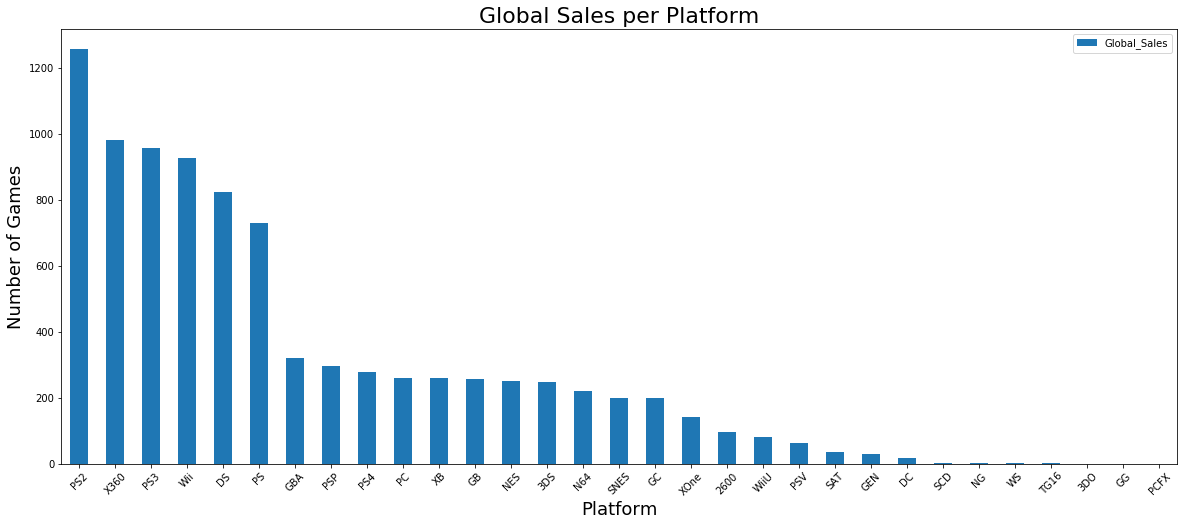

In [30]:
#Plots the breakdown of games sold globally according to Platform from 1980 to 2020
vid_games.groupby(vid_games.Platform).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Global Sales per Platform', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Platform',fontsize=18)
plt.ylabel('Number of Games', fontsize=18);

In [31]:
#Shows the breakdown of games sold globally according to Publisher from 1980 to 2020 excluding games with missing publisher field
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False)

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


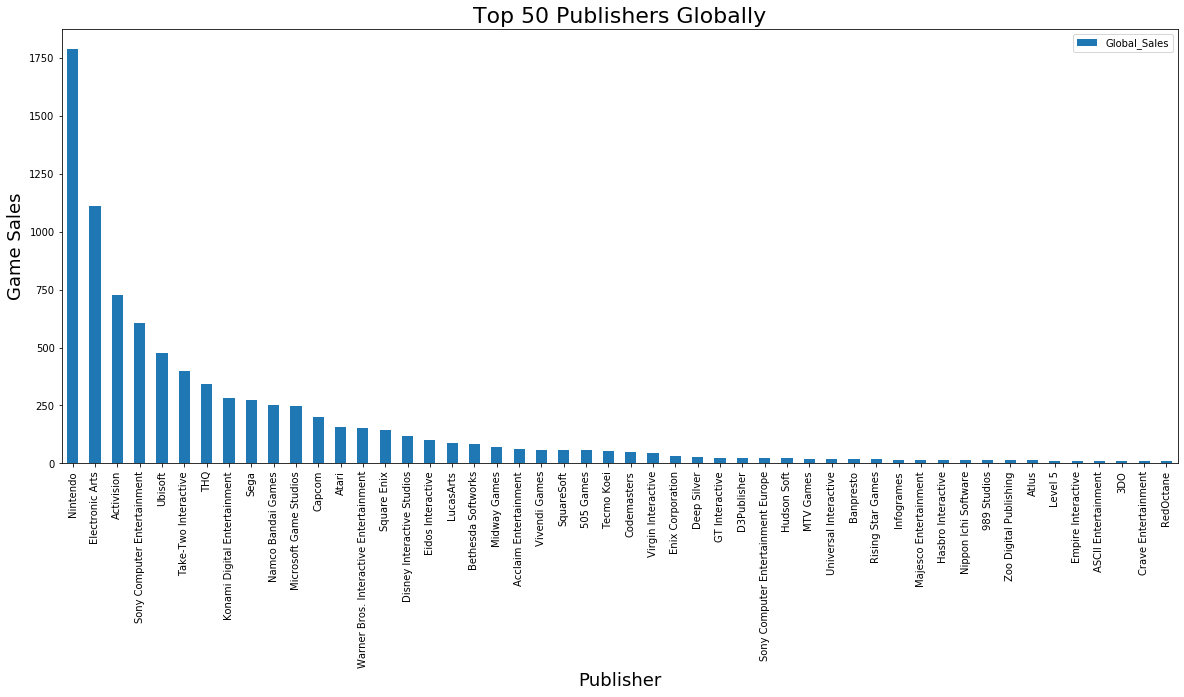

In [32]:
#Plots the breakdown of games sold globally according to top 50 Publishers from 1980 to 2020 excluding entries with missing publisher field
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False).head(50).plot(kind='bar',figsize=(20,8))  
plt.title('Top 50 Publishers Globally', fontsize=22)
plt.xlabel('Publisher',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

**Even though Electronic Arts published more games, Nintendo outsold them by over 600 million copies.**

In [33]:
#Shows the breakdown of games sold globally according to Year from 1980 to 2020
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'Global_Sales':'sum'})

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


Text(0, 0.5, 'Sales')

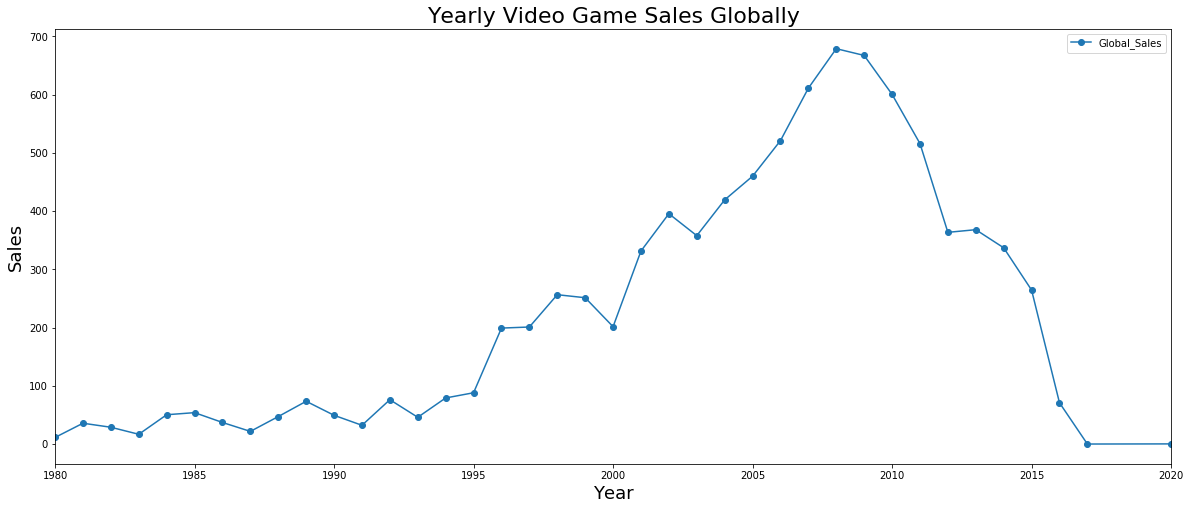

In [34]:
#Plots the breakdown of games sold globally according to Year from 1980 to 2020
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'Global_Sales':'sum'}).plot(kind='line', figsize=(20,8),marker='o')
plt.title('Yearly Video Game Sales Globally', fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Sales', fontsize=18)

**Video Game purchase peaked globally in 2008, and has seen a significant decline in the years after 2009.**

In [35]:
vid_games.Name.nunique()   #shows bumber of unique games

11493

In [36]:
#Shows the breakdown of top 100 Games sold globally from 1980 to 2020
vid_games.groupby(vid_games.Name).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False).head(100)

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


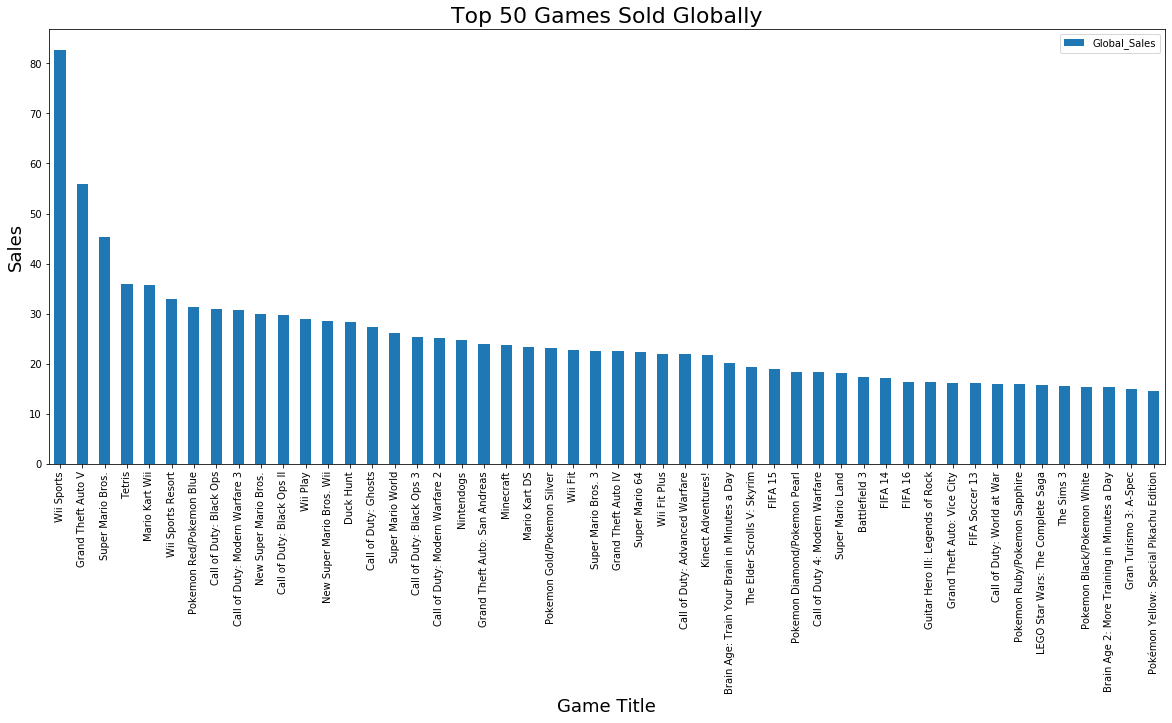

In [37]:
#Plots the breakdown of top 50 Games sold globally from 1980 to 2020
vid_games.groupby(vid_games.Name).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False).head(50).plot(kind='bar', figsize=(20,8))  
plt.title('Top 50 Games Sold Globally', fontsize=22)
plt.xlabel('Game Title',fontsize=18)
plt.ylabel('Sales', fontsize=18);

# Breakdown of Game Sales Per Region

# Games Sold in North America

**Action games sold the most in North America, followed by Sports Games. Strategy games sold the least in this region. On the whole, games which required cognitive functions sold the least.**

In [38]:
#Shows the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False)

,NA_Sales
Genre,
Action,877.83
Sports,683.35
Shooter,582.60
Platform,447.05
Misc,410.24
Racing,359.42
Role-Playing,327.28
Fighting,223.59
Simulation,183.31


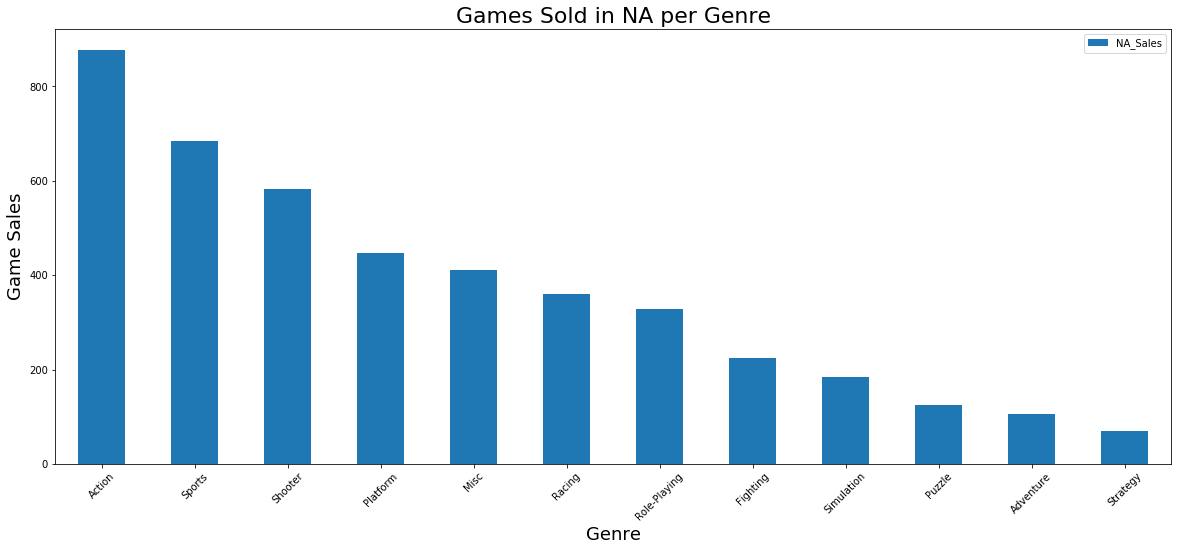

In [39]:
#Plots the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in NA per Genre', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [40]:
#Shows the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False)

,NA_Sales
Platform,
X360,601.05
PS2,583.84
Wii,507.71
PS3,392.26
DS,390.71
PS,336.51
GBA,187.54
XB,186.69
N64,139.02


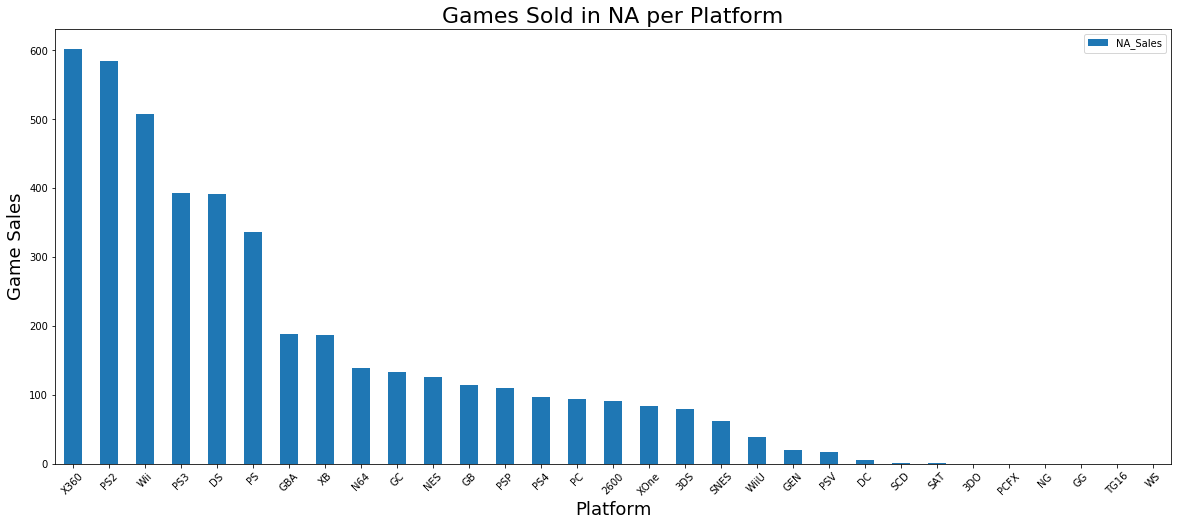

In [41]:
#Plots the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in NA per Platform', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Platform',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

**Majority of Games sold in North America were on the X360 platform, developed by a North American compan

In [42]:
#Shows the breakdown of game sales according to to 10 Publishers (Excluding games with missing publisher fields)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False).head(10)

,NA_Sales
Publisher,
Nintendo,816.87
Electronic Arts,595.07
Activision,429.70
Sony Computer Entertainment,265.22
Ubisoft,253.43
Take-Two Interactive,220.49
THQ,208.77
Microsoft Game Studios,155.35
Atari,110.04


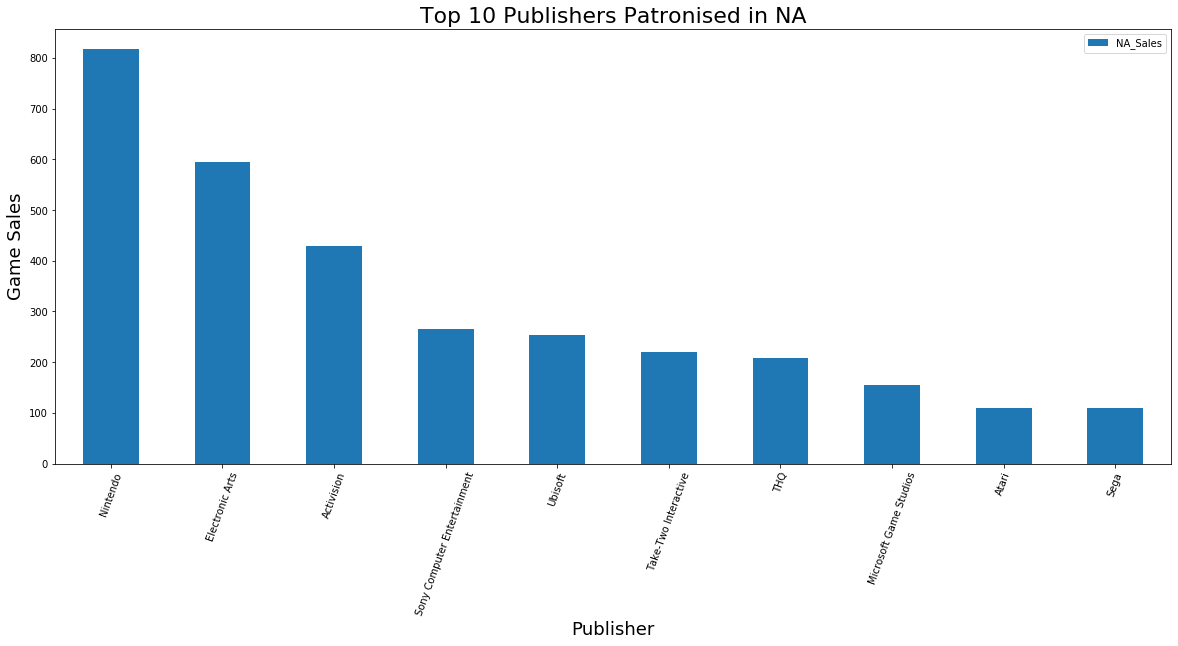

In [43]:
#Plots the breakdown of game sales according to top 10 Publishers (excluding games with missing publisher)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False).head(10).plot(kind='bar',figsize=(20,8))  
plt.title('Top 10 Publishers Patronised in NA', fontsize=22)
plt.xticks(rotation=70)
plt.xlabel('Publisher',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [44]:
#Shows the breakdown of game sales according to Year (excluding games with missing year fields)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'NA_Sales':'sum'})

,NA_Sales
Year,
1980.0,10.59
1981.0,33.40
1982.0,26.92
1983.0,7.76
1984.0,33.28
1985.0,33.73
1986.0,12.50
1987.0,8.46
1988.0,23.87


Text(0, 0.5, 'Sales')

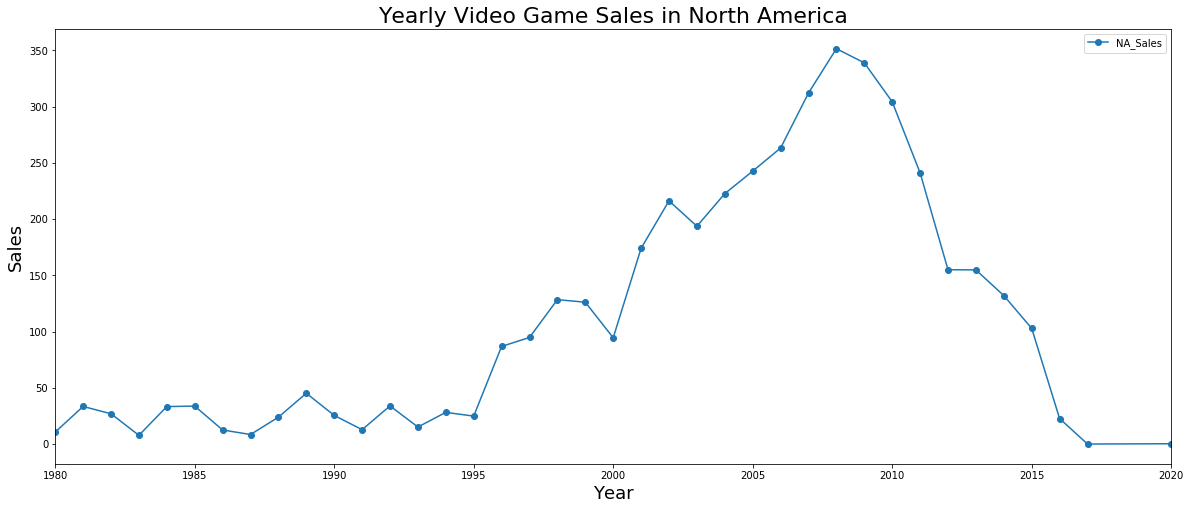

In [45]:
#Plots the breakdown of game sales according to Year (Excluding games with missing year)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'NA_Sales':'sum'}).plot(kind='line',figsize=(20,8),marker='o')
plt.title('Yearly Video Game Sales in North America', fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Sales', fontsize=18)

In [46]:
#Shows the breakdown of top 100 Games sold
vid_games.groupby(vid_games.Name).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False).head(100)

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
Call of Duty: Black Ops,17.59
Super Mario World,15.99
Mario Kart Wii,15.85
Wii Sports Resort,15.75


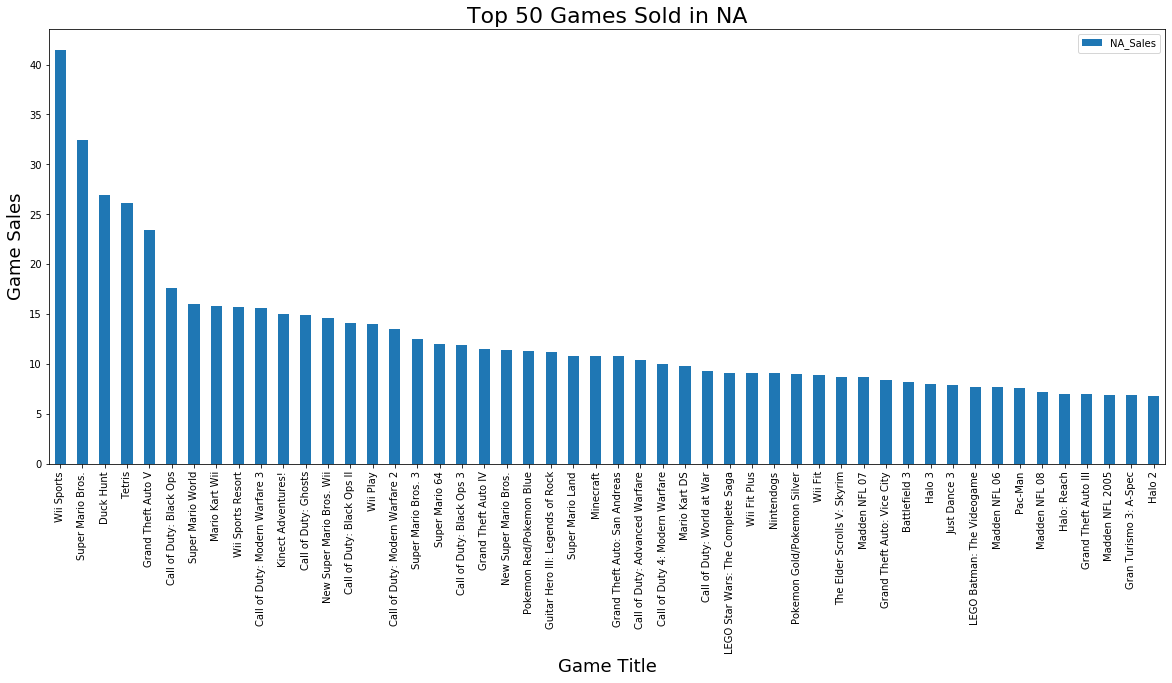

In [47]:
#Plots the breakdown of top 50 Games sold
vid_games.groupby(vid_games.Name).agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales', ascending=False).head(50).plot(kind='bar',figsize=(20,8))  
plt.title('Top 50 Games Sold in NA', fontsize=22)
plt.xlabel('Game Title',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [48]:
#Shows the breakdown of game sales according in each year according to Genre
vid_games.groupby([vid_games[vid_games.Year!=0].Year,vid_games[vid_games.Year!=0].Genre]).agg({'NA_Sales':'sum'})

NA_Sales
Year   Genre                 
1980.0 Action            0.32
       Fighting          0.72
       Misc              2.53
       Shooter           6.56
       Sports            0.46
1981.0 Action           13.86
       Platform          6.47
       Puzzle            2.09
       Racing            0.45
       Shooter           9.37
       Simulation        0.42
       Sports            0.74
1982.0 Action            6.07
       Misc              0.81
       Platform          4.69
       Puzzle            9.35
       Racing            1.47
       Shooter           3.55
       Sports            0.98
1983.0 Action            2.67
       Adventure         0.38
       Misc              0.01
       Platform          2.80
       Puzzle            0.72
       Shooter           0.45
       Sports            0.73
1984.0 Action            0.80
       Misc              0.00
       Platform          0.00
       Puzzle            0.69
...                       ...
2014.0 Shooter          30.72
       Simulation        1.22
       Sports           19.82
       Strategy          0.16
2015.0 Action           22.83
       Adventure         2.76
       Fighting          3.60
       Misc              4.81
       Platform          2.50
       Puzzle            0.05
       Racing            1.97
       Role-Playing     13.35
       Shooter          30.79
       Simulation        1.13
       Sports           18.46
       Strategy          0.57
2016.0 Action            5.87
       Adventure         0.34
       Fighting          1.60
       Misc              0.22
       Platform          0.79
       Racing            0.33
       Role-Playing      1.39
       Shooter           7.44
       Simulation        0.00
       Sports            4.57
       Strategy          0.11
2017.0 Action            0.00
       Role-Playing      0.00
2020.0 Simulation        0.27

[389 rows x 1 columns]

# Games Sold in Europe##

**Similar to North America, Action games and Sports games sold the most with Strategy games, along with other Genres which required higher cognitive functions sold the least.**

In [49]:
#Shows the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False)

,EU_Sales
Genre,
Action,525.00
Sports,376.85
Shooter,313.27
Racing,238.39
Misc,215.98
Platform,201.63
Role-Playing,188.06
Simulation,113.38
Fighting,101.32


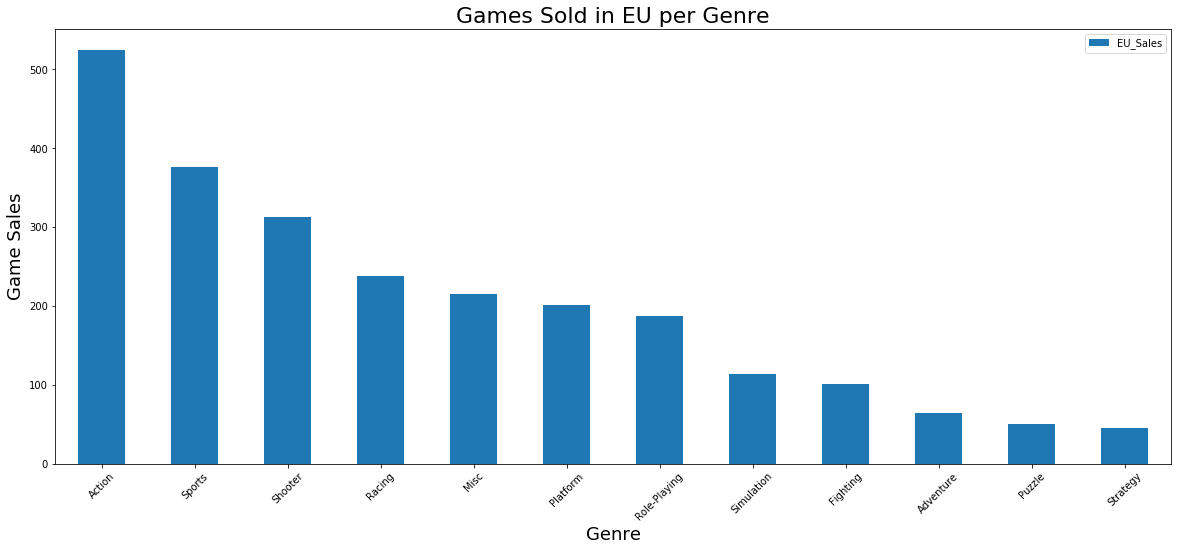

In [50]:
#Plots the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in EU per Genre', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [51]:
#Shows the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False)

,EU_Sales
Platform,
PS3,343.71
PS2,339.29
X360,280.58
Wii,268.38
PS,213.60
DS,194.65
PC,139.68
PS4,123.70
GBA,75.25


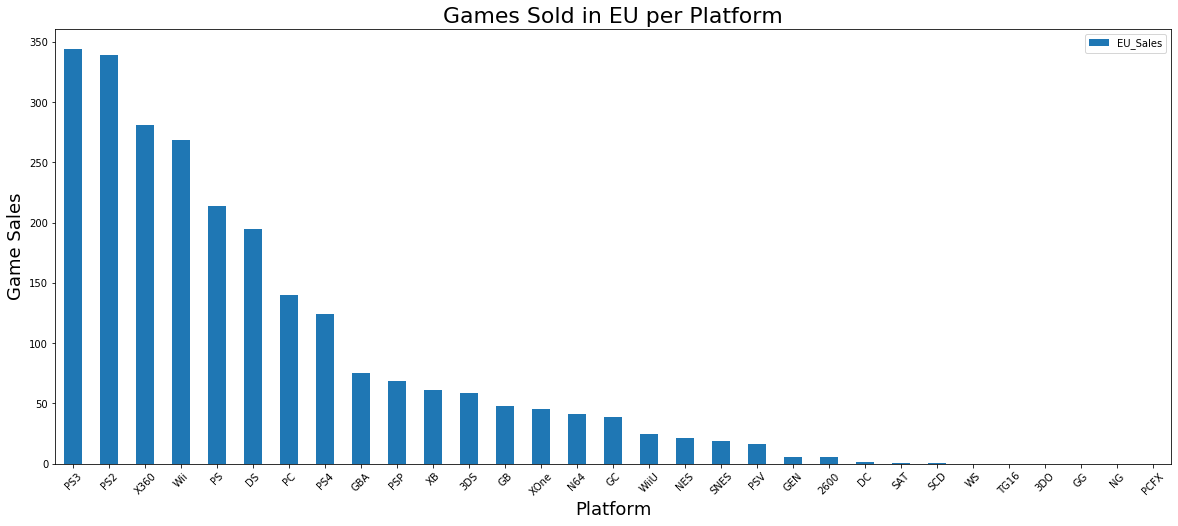

In [52]:
#Plots the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in EU per Platform', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Platform',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [53]:
#Shows the breakdown of game sales according to to 10 Publishers (Excluding games with missing publisher fields)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False).head(10)

,EU_Sales
Publisher,
Nintendo,418.74
Electronic Arts,371.27
Activision,215.53
Sony Computer Entertainment,187.72
Ubisoft,163.32
Take-Two Interactive,118.14
THQ,94.73
Sega,82.00
Konami Digital Entertainment,69.69


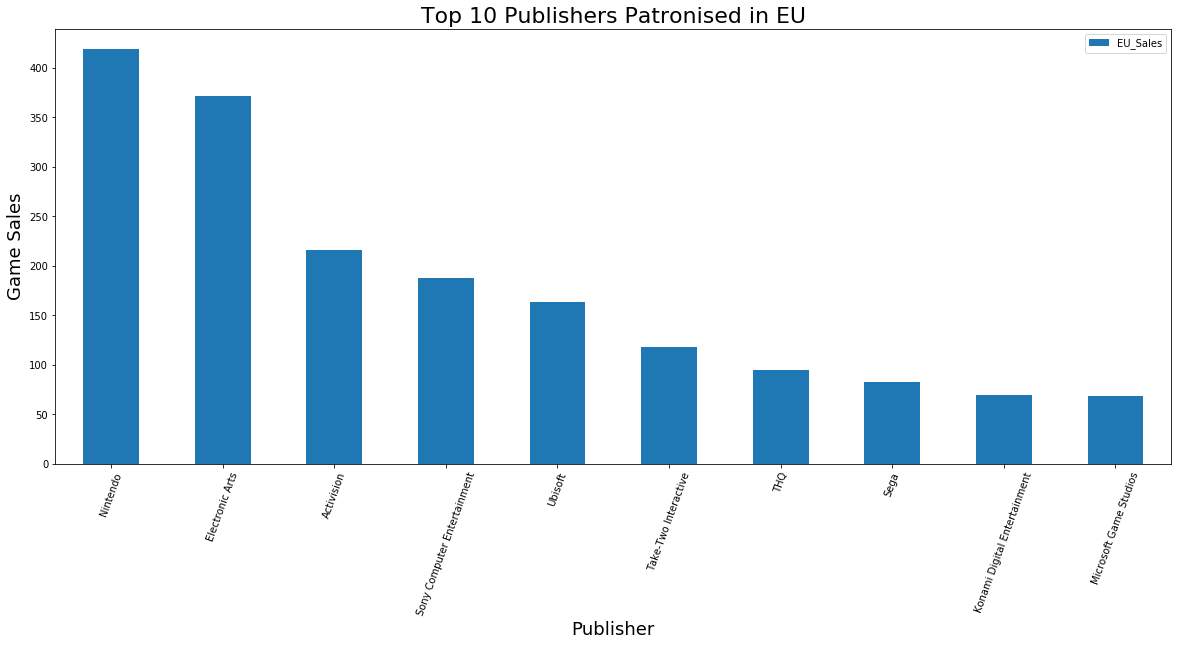

In [54]:
#Plots the breakdown of game sales according to top 10 Publishers (excluding games with missing publisher)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False).head(10).plot(kind='bar',figsize=(20,8))  
plt.title('Top 10 Publishers Patronised in EU', fontsize=22)
plt.xticks(rotation=70)
plt.xlabel('Publisher',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [55]:
#Shows the breakdown of game sales according to Year (excluding games with missing year fields)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'EU_Sales':'sum'})

,EU_Sales
Year,
1980.0,0.67
1981.0,1.96
1982.0,1.65
1983.0,0.80
1984.0,2.10
1985.0,4.74
1986.0,2.84
1987.0,1.41
1988.0,6.59


Text(0, 0.5, 'Sales')

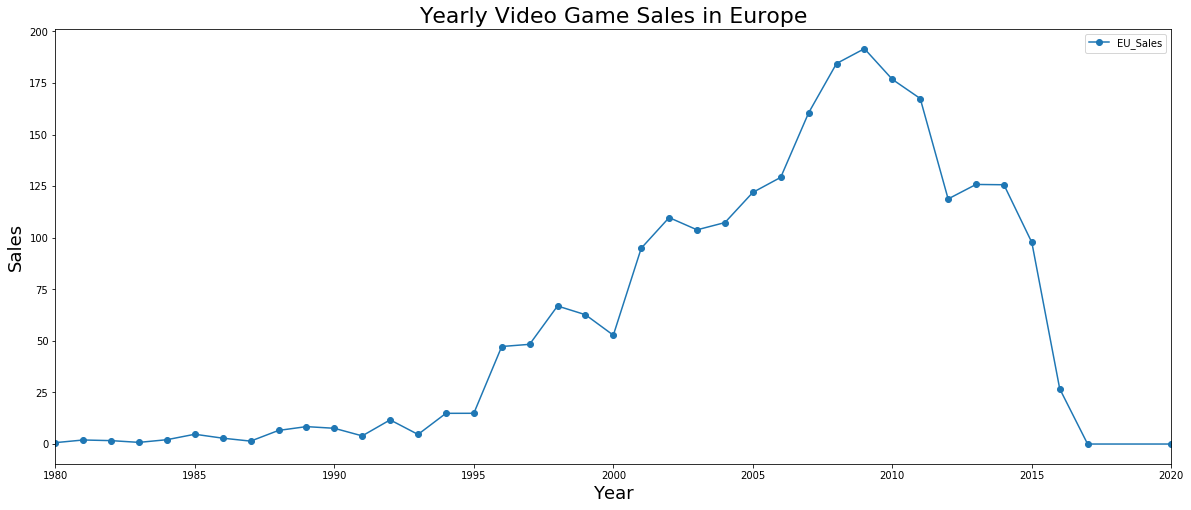

In [56]:
#Plots the breakdown of game sales according to Year (Excluding games with missing year)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'EU_Sales':'sum'}).plot(kind='line',figsize=(20,8),marker='o')
plt.title('Yearly Video Game Sales in Europe', fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Sales', fontsize=18)

In [57]:
#Shows the breakdown of top 100 Games sold
vid_games.groupby(vid_games.Name).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False).head(100)

,EU_Sales
Name,
Wii Sports,29.02
Grand Theft Auto V,23.04
Mario Kart Wii,12.88
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29
FIFA 16,11.29
FIFA 14,11.14
Call of Duty: Black Ops II,11.05
Wii Sports Resort,11.01


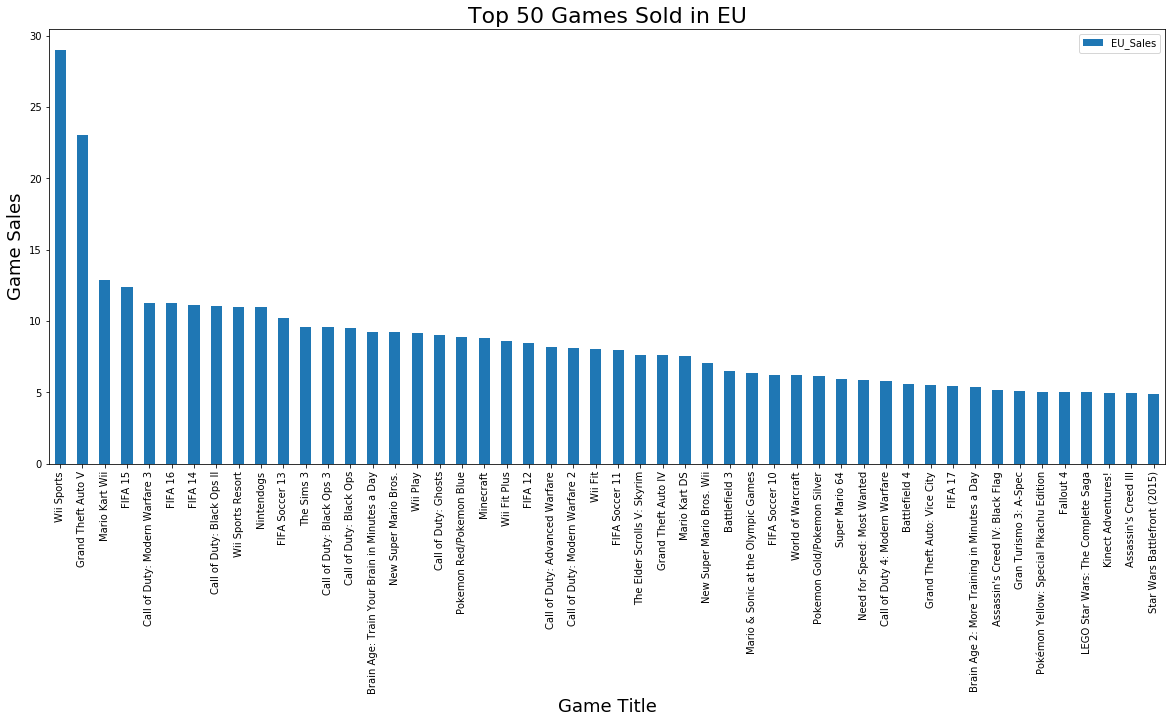

In [58]:
#Plots the breakdown of top 50 Games sold
vid_games.groupby(vid_games.Name).agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales', ascending=False).head(50).plot(kind='bar',figsize=(20,8))  
plt.title('Top 50 Games Sold in EU', fontsize=22)
plt.xlabel('Game Title',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [59]:
#Shows the breakdown of game sales according in each year according to Genre
vid_games.groupby([vid_games[vid_games.Year!=0].Year,vid_games[vid_games.Year!=0].Genre]).agg({'EU_Sales':'sum'})

EU_Sales
Year   Genre                 
1980.0 Action            0.02
       Fighting          0.04
       Misc              0.15
       Shooter           0.43
       Sports            0.03
1981.0 Action            0.81
       Platform          0.37
       Puzzle            0.13
       Racing            0.03
       Shooter           0.56
       Simulation        0.02
       Sports            0.04
1982.0 Action            0.38
       Misc              0.05
       Platform          0.28
       Puzzle            0.58
       Racing            0.09
       Shooter           0.21
       Sports            0.06
1983.0 Action            0.17
       Adventure         0.02
       Misc              0.00
       Platform          0.43
       Puzzle            0.05
       Shooter           0.03
       Sports            0.10
1984.0 Action            0.19
       Misc              0.00
       Platform          0.00
       Puzzle            0.18
...                       ...
2014.0 Shooter          25.81
       Simulation        3.44
       Sports           18.70
       Strategy          0.22
2015.0 Action           24.65
       Adventure         3.38
       Fighting          2.38
       Misc              3.71
       Platform          1.81
       Puzzle            0.11
       Racing            4.74
       Role-Playing     12.52
       Shooter          24.23
       Simulation        2.51
       Sports           16.69
       Strategy          0.98
2016.0 Action            6.36
       Adventure         0.39
       Fighting          1.15
       Misc              0.09
       Platform          0.87
       Racing            1.14
       Role-Playing      1.29
       Shooter           7.70
       Simulation        0.09
       Sports            7.36
       Strategy          0.32
2017.0 Action            0.00
       Role-Playing      0.00
2020.0 Simulation        0.00

[389 rows x 1 columns]

# Games Sold in Japan##

**Role Playing games sold the most by far in Japan, with Shooters selling the least. Game sales in Japan by Japanese companies were by far the majority, with Nintendo leading the way by a wide margin.
Video game sales in Japan rose significantly in 1995 and peaked in 2007.**

In [60]:
#Shows the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False)

,JP_Sales
Genre,
Role-Playing,352.31
Action,159.95
Sports,135.37
Platform,130.77
Misc,107.76
Fighting,87.35
Simulation,63.70
Puzzle,57.31
Racing,56.69


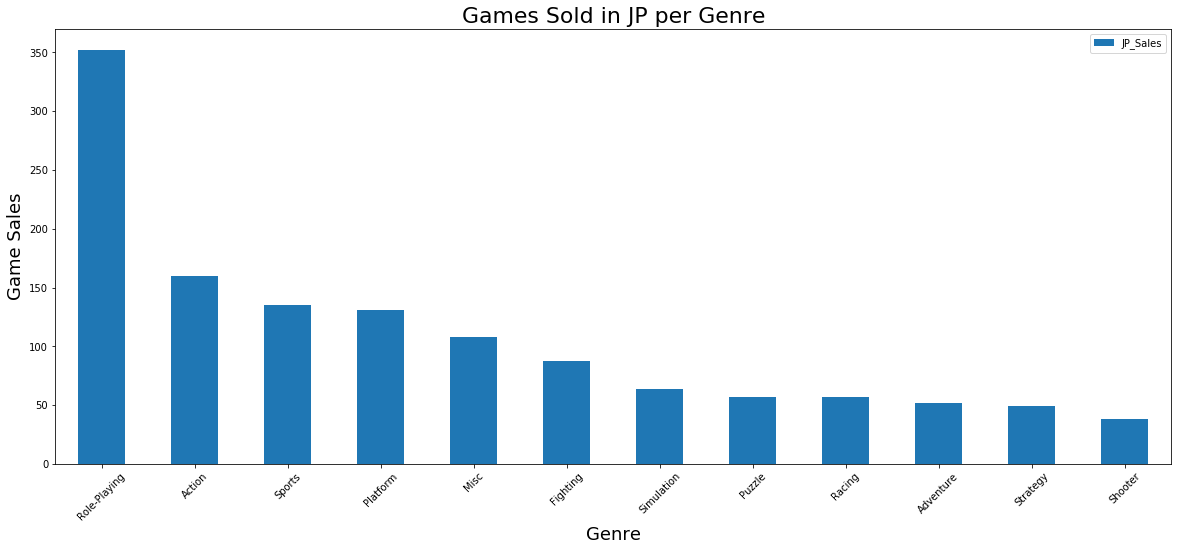

In [61]:
#Plots the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in JP per Genre', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [62]:
#Shows the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False)

,JP_Sales
Platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
NES,98.65
3DS,97.35
GB,85.12
PS3,79.99
PSP,76.79


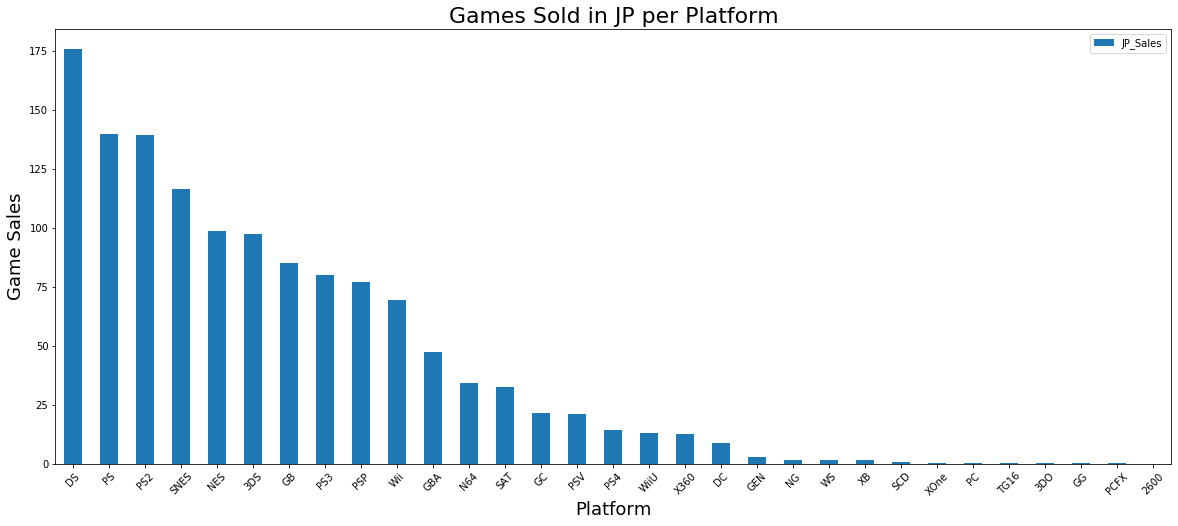

In [63]:
#Plots the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in JP per Platform', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Platform',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [64]:
#Shows the breakdown of game sales according to to 10 Publishers (Excluding games with missing publisher fields)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False).head(10)

,JP_Sales
Publisher,
Nintendo,455.42
Namco Bandai Games,127.07
Konami Digital Entertainment,91.30
Sony Computer Entertainment,74.10
Capcom,68.08
Sega,57.03
Square Enix,49.88
SquareSoft,40.13
Enix Corporation,32.40


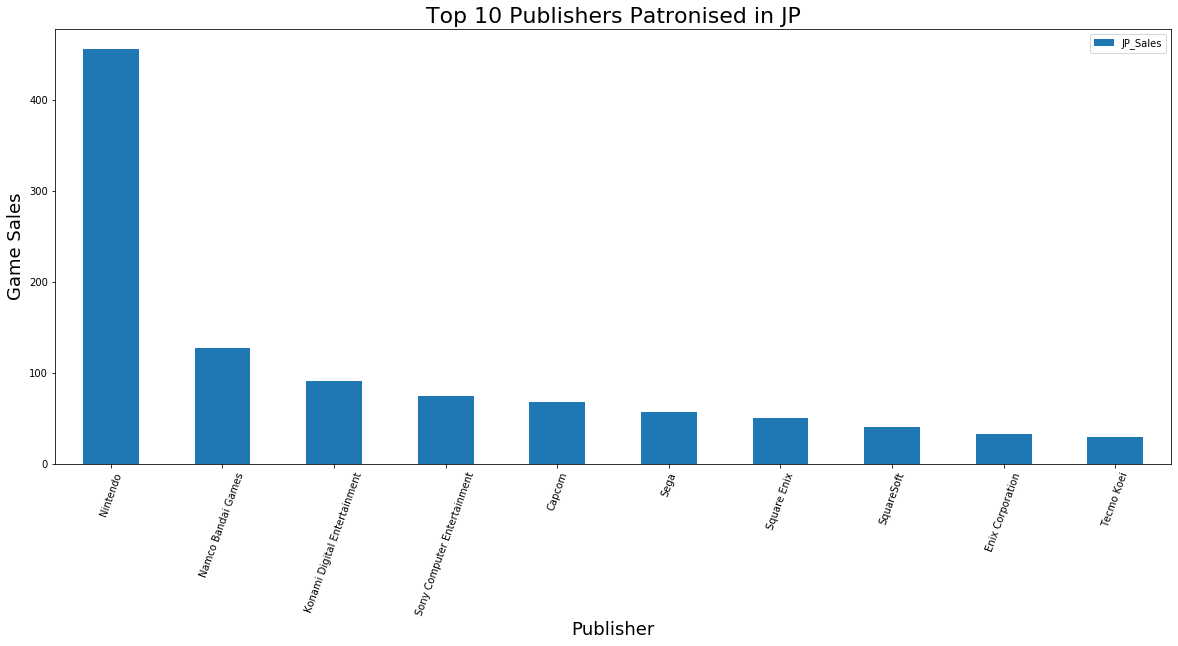

In [65]:
#Plots the breakdown of game sales according to top 10 Publishers (excluding games with missing publisher)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False).head(10).plot(kind='bar',figsize=(20,8))  
plt.title('Top 10 Publishers Patronised in JP', fontsize=22)
plt.xticks(rotation=70)
plt.xlabel('Publisher',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [66]:
#Shows the breakdown of game sales according to Year (excluding games with missing year fields)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'JP_Sales':'sum'})

,JP_Sales
Year,
1980.0,0.00
1981.0,0.00
1982.0,0.00
1983.0,8.10
1984.0,14.27
1985.0,14.56
1986.0,19.81
1987.0,11.63
1988.0,15.76


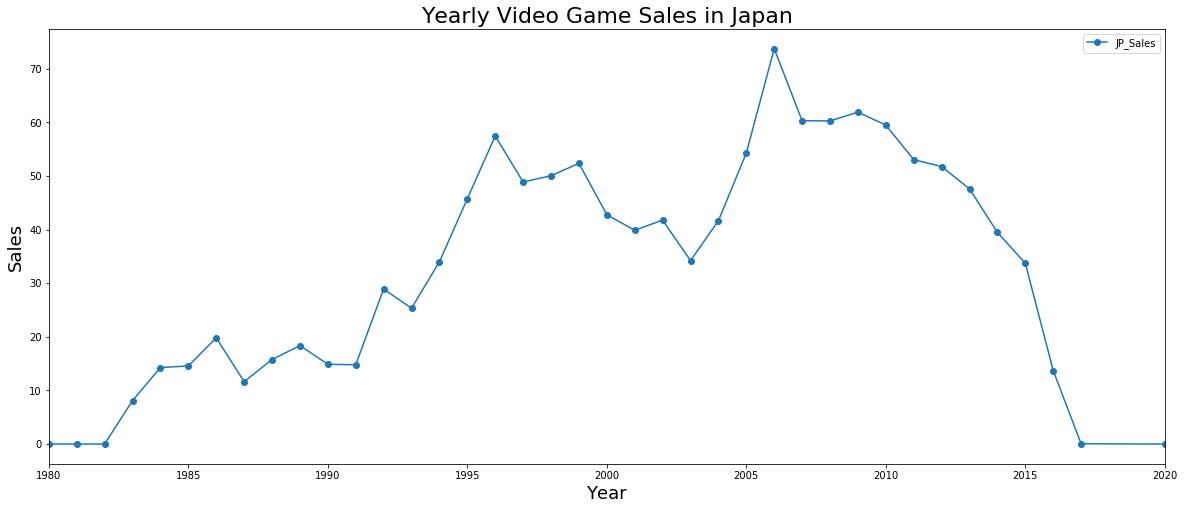

In [67]:
#Plots the breakdown of game sales according to Year (Excluding games with missing year)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'JP_Sales':'sum'}).plot(kind='line',figsize=(20,8),marker='o')
plt.title('Yearly Video Game Sales in Japan', fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Sales', fontsize=18);

In [68]:
#Shows the breakdown of top 100 Games sold
vid_games.groupby(vid_games.Name).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False).head(100)

,JP_Sales
Name,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.96
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04
Tetris,6.03
Pokemon Black/Pokemon White,5.65
Dragon Quest VII: Warriors of Eden,5.40
Pokemon Ruby/Pokemon Sapphire,5.38


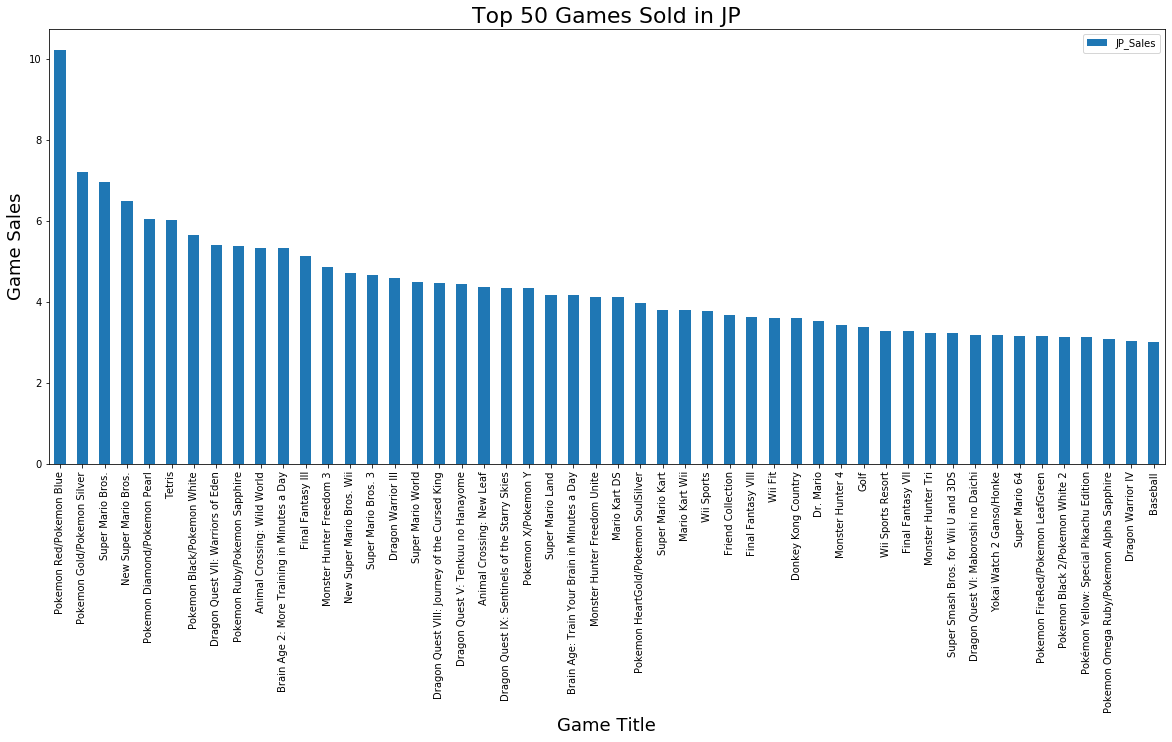

In [69]:
#Plots the breakdown of top 50 Games sold
vid_games.groupby(vid_games.Name).agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales', ascending=False).head(50).plot(kind='bar',figsize=(20,8))  
plt.title('Top 50 Games Sold in JP', fontsize=22)
plt.xlabel('Game Title',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [70]:
#Shows the breakdown of game sales according in each year according to Genre
vid_games.groupby([vid_games[vid_games.Year!=0].Year,vid_games[vid_games.Year!=0].Genre]).agg({'JP_Sales':'sum'})

JP_Sales
Year   Genre                 
1980.0 Action            0.00
       Fighting          0.00
       Misc              0.00
       Shooter           0.00
       Sports            0.00
1981.0 Action            0.00
       Platform          0.00
       Puzzle            0.00
       Racing            0.00
       Shooter           0.00
       Simulation        0.00
       Sports            0.00
1982.0 Action            0.00
       Misc              0.00
       Platform          0.00
       Puzzle            0.00
       Racing            0.00
       Shooter           0.00
       Sports            0.00
1983.0 Action            0.00
       Adventure         0.00
       Misc              2.13
       Platform          3.62
       Puzzle            0.00
       Shooter           0.00
       Sports            2.35
1984.0 Action            0.83
       Misc              1.45
       Platform          0.69
       Puzzle            2.23
...                       ...
2014.0 Shooter           1.08
       Simulation        0.37
       Sports            1.60
       Strategy          0.55
2015.0 Action           15.85
       Adventure         1.04
       Fighting          0.79
       Misc              2.10
       Platform          1.29
       Puzzle            0.52
       Racing            0.28
       Role-Playing      6.71
       Shooter           2.69
       Simulation        1.58
       Sports            0.72
       Strategy          0.15
2016.0 Action            5.79
       Adventure         0.97
       Fighting          0.64
       Misc              0.81
       Platform          0.11
       Racing            0.01
       Role-Playing      3.63
       Shooter           0.61
       Simulation        0.30
       Sports            0.78
       Strategy          0.05
2017.0 Action            0.01
       Role-Playing      0.04
2020.0 Simulation        0.00

[389 rows x 1 columns]

# Games Sold in Other Parts of the World

**Action and Sports games sold the most in other parts of the world, with Puzzles and Strategy selling the least.**

In [71]:
#Shows the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'Other_Sales':'count'}).sort_values(by='Other_Sales', ascending=False)

,Other_Sales
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


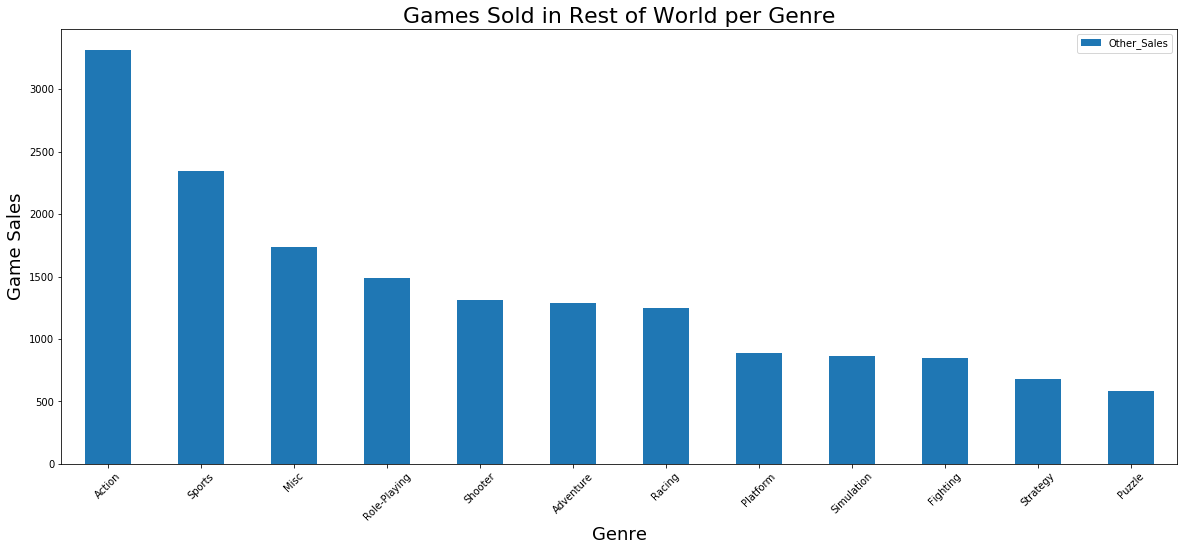

In [72]:
#Plots the breakdown of game sales according to Genre
vid_games.groupby(vid_games.Genre).agg({'Other_Sales':'count'}).sort_values(by='Other_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in Rest of World per Genre', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [73]:
#Shows the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales', ascending=False)

,Other_Sales
Platform,
PS2,193.44
PS3,141.93
X360,85.54
Wii,80.61
DS,60.53
PS4,43.36
PSP,42.19
PS,40.91
PC,24.86


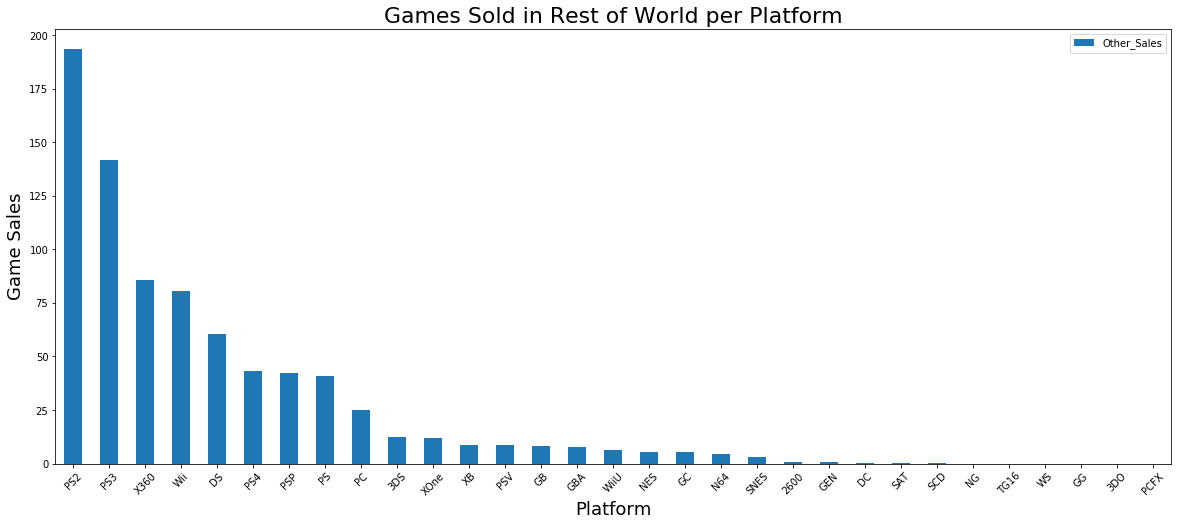

In [74]:
#Plots the breakdown of game sales according to Platform
vid_games.groupby(vid_games.Platform).agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales', ascending=False).plot(kind='bar',figsize=(20,8))  
plt.title('Games Sold in Rest of World per Platform', fontsize=22)
plt.xticks(rotation=45)
plt.xlabel('Platform',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [75]:
#Shows the breakdown of game sales according to to 10 Publishers (Excluding games with missing publisher fields)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales', ascending=False).head(10)

,Other_Sales
Publisher,
Electronic Arts,129.77
Nintendo,95.33
Sony Computer Entertainment,80.45
Activision,75.34
Take-Two Interactive,55.24
Ubisoft,50.26
THQ,32.14
Konami Digital Entertainment,30.31
Sega,24.52


Text(0, 0.5, 'Game Sales')

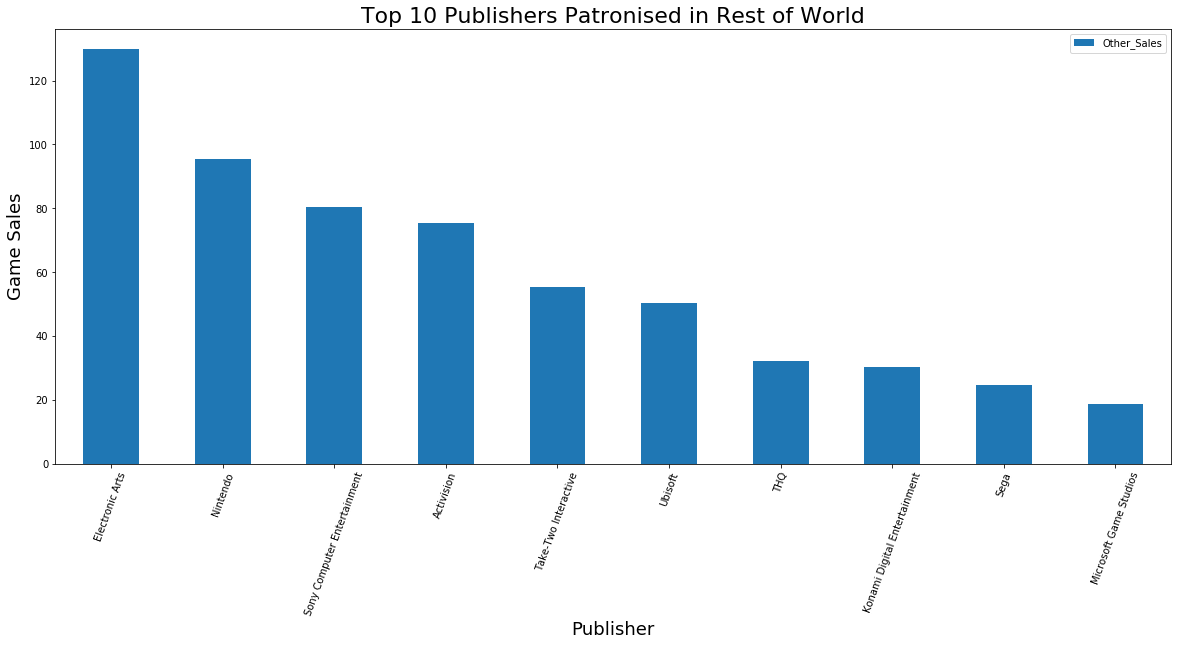

In [76]:
#Plots the breakdown of game sales according to top 10 Publishers (excluding games with missing publisher)
vid_games.groupby(vid_games[vid_games.Publisher!='Unknown'].Publisher).agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales', ascending=False).head(10).plot(kind='bar',figsize=(20,8))
plt.title('Top 10 Publishers Patronised in Rest of World', fontsize=22)
plt.xticks(rotation=70)
plt.xlabel('Publisher',fontsize=18)
plt.ylabel('Game Sales', fontsize=18)

In [77]:
#Shows the breakdown of game sales according to Year (excluding games with missing year fields)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'Other_Sales':'sum'})

,Other_Sales
Year,
1980.0,0.12
1981.0,0.32
1982.0,0.31
1983.0,0.14
1984.0,0.70
1985.0,0.92
1986.0,1.93
1987.0,0.20
1988.0,0.99


Text(0, 0.5, 'Sales')

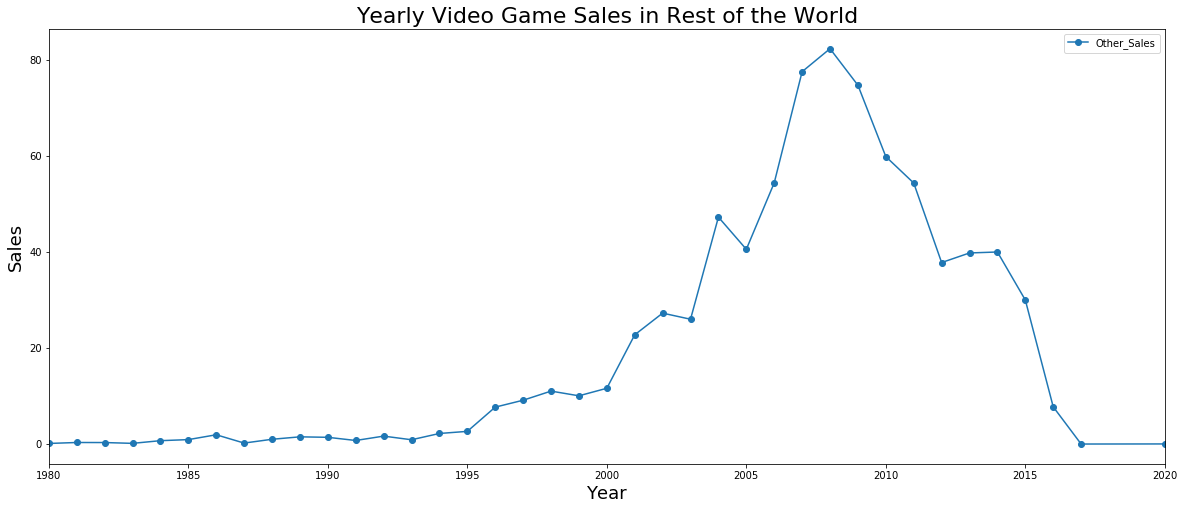

In [78]:
#Plots the breakdown of game sales according to Year (Excluding games with missing year)
vid_games.groupby(vid_games[vid_games.Year!=0].Year).agg({'Other_Sales':'sum'}).plot(kind='line',figsize=(20,8),marker='o')
plt.title('Yearly Video Game Sales in Rest of the World', fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Sales', fontsize=18)

In [79]:
#Shows the breakdown of top 100 Games sold
vid_games.groupby(vid_games.Name).agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales', ascending=False).head(100)

,Other_Sales
Name,
Grand Theft Auto: San Andreas,10.72
Wii Sports,8.46
Grand Theft Auto V,8.03
Gran Turismo 4,7.53
Call of Duty: Black Ops II,3.88
FIFA Soccer 08,3.53
Pro Evolution Soccer 2008,3.51
Call of Duty: Black Ops 3,3.42
Call of Duty: Black Ops,3.36


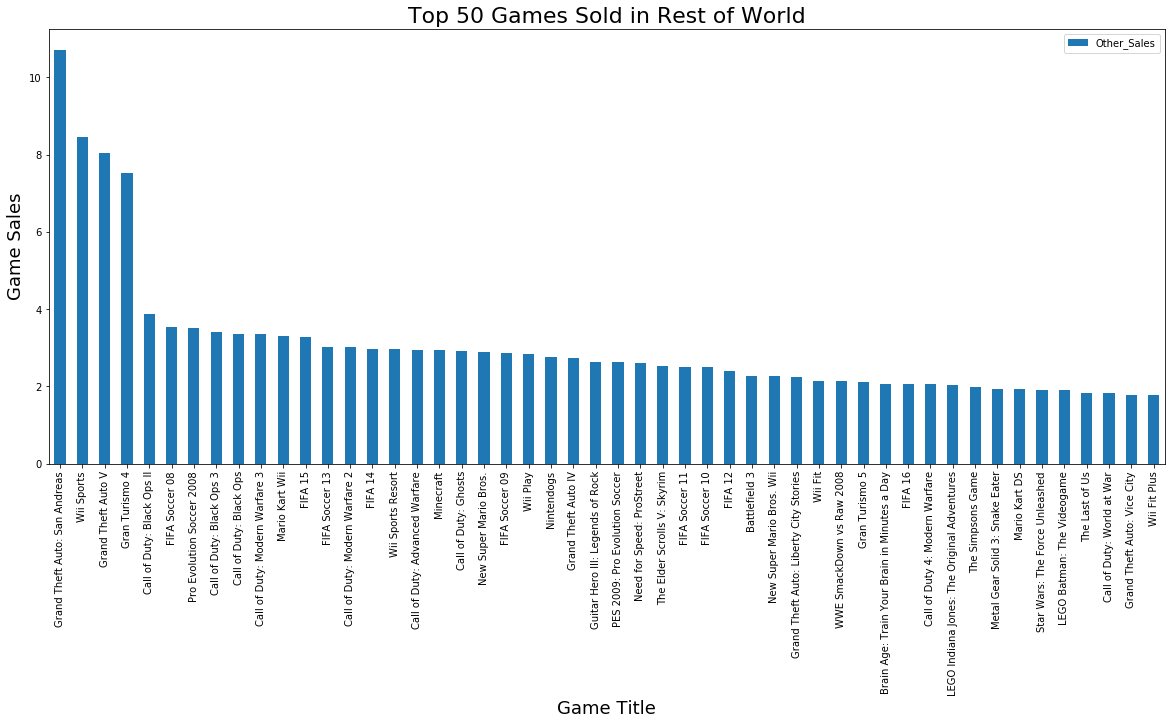

In [80]:
#Plots the breakdown of top 50 Games sold
vid_games.groupby(vid_games.Name).agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales', ascending=False).head(50).plot(kind='bar',figsize=(20,8))  
plt.title('Top 50 Games Sold in Rest of World', fontsize=22)
plt.xlabel('Game Title',fontsize=18)
plt.ylabel('Game Sales', fontsize=18);

In [81]:
#Shows the breakdown of game sales according in each year according to Genre
vid_games.groupby([vid_games[vid_games.Year!=0].Year,vid_games[vid_games.Year!=0].Genre]).agg({'Other_Sales':'sum'})

Other_Sales
Year   Genre                    
1980.0 Action               0.00
       Fighting             0.01
       Misc                 0.02
       Shooter              0.08
       Sports               0.01
1981.0 Action               0.12
       Platform             0.08
       Puzzle               0.03
       Racing               0.00
       Shooter              0.09
       Simulation           0.00
       Sports               0.00
1982.0 Action               0.05
       Misc                 0.01
       Platform             0.06
       Puzzle               0.11
       Racing               0.01
       Shooter              0.05
       Sports               0.02
1983.0 Action               0.02
       Adventure            0.00
       Misc                 0.00
       Platform             0.08
       Puzzle               0.01
       Shooter              0.01
       Sports               0.02
1984.0 Action               0.03
       Misc                 0.00
       Platform             0.00
       Puzzle               0.04
...                          ...
2014.0 Shooter              8.38
       Simulation           0.51
       Sports               6.52
       Strategy             0.04
2015.0 Action               7.33
       Adventure            0.85
       Fighting             1.01
       Misc                 1.04
       Platform             0.45
       Puzzle               0.01
       Racing               0.93
       Role-Playing         3.85
       Shooter              8.41
       Simulation           0.39
       Sports               5.62
       Strategy             0.12
2016.0 Action               1.83
       Adventure            0.11
       Fighting             0.46
       Misc                 0.03
       Platform             0.31
       Racing               0.19
       Role-Playing         0.44
       Shooter              2.42
       Simulation           0.00
       Sports               1.92
       Strategy             0.04
2017.0 Action               0.00
       Role-Playing         0.00
2020.0 Simulation           0.02

[389 rows x 1 columns]

In [82]:
#plt.figure(figsize=(25,10))
#plt.xticks(rotation=45)
#sns.countplot(x=vid_games[vid_games.Year!=0].Year, data=gvo, hue=vid_games[vid_games.Year!=0].Genre);

In [83]:
vid_games.to_csv(r'Vid_games_modified.csv', index = False) #save modified file disk